In [53]:
import splitfolders
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import optimizers
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
classes = ['Bicycle', 'Car']

In [55]:
!rm -r splited
splitfolders.ratio(f'data', output="splited", seed=1337, ratio=(0.8, 0.1, 0.1))

validation_dir = 'splited/val'
test_dir = 'splited/test'
train_dir = 'splited/train'

Copying files: 1415 files [00:00, 1966.61 files/s]


In [56]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [57]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.01),
              metrics=['acc'])

In [58]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=20,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    class_mode='binary')

Found 1131 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [59]:
history = model.fit(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20


2022-03-24 14:29:43.090035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.6912 - acc: 0.5207

2022-03-24 14:29:58.215681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 17s 313ms/step - loss: 0.6912 - acc: 0.5207 - val_loss: 0.6907 - val_acc: 0.6214
Epoch 2/20
50/50 [==============================] - 14s 277ms/step - loss: 0.6895 - acc: 0.6014
Epoch 3/20
50/50 [==============================] - 14s 273ms/step - loss: 0.6878 - acc: 0.6317
Epoch 4/20
50/50 [==============================] - 14s 272ms/step - loss: 0.6845 - acc: 0.6206
Epoch 5/20
50/50 [==============================] - 14s 272ms/step - loss: 0.6807 - acc: 0.6276
Epoch 6/20
50/50 [==============================] - 14s 275ms/step - loss: 0.6781 - acc: 0.6448
Epoch 7/20
50/50 [==============================] - 14s 271ms/step - loss: 0.6724 - acc: 0.6266
Epoch 8/20
50/50 [==============================] - 14s 274ms/step - loss: 0.6649 - acc: 0.6569
Epoch 9/20
50/50 [==============================] - 14s 273ms/step - loss: 0.6520 - acc: 0.6640
Epoch 10/20
50/50 [==============================] - 14s 272ms/step - loss: 0.6356 - acc: 0.6751
Epoch 11/20
5

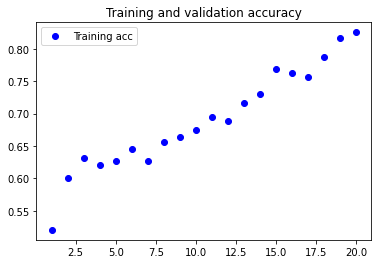

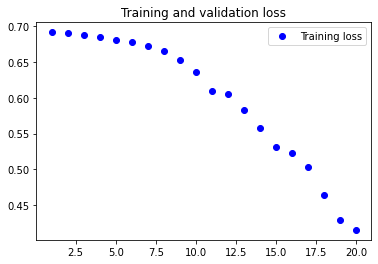

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [61]:
test_loss, test_acc = model.evaluate(test_generator)

5/5 [==============================] - 2s 193ms/step - loss: 0.3440 - acc: 0.8542


In [62]:
test_acc

0.8541666865348816

In [67]:
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator)

In [68]:
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [69]:
matrix = confusion_matrix(y_true, [0 if i < 0.5 else 1 for i in y_pred])
matrix

array([[263, 302],
       [250, 316]])

In [70]:
res = classification_report(y_true, [0 if i < 0.5 else 1 for i in y_pred])
print(res)

              precision    recall  f1-score   support

           0       0.51      0.47      0.49       565
           1       0.51      0.56      0.53       566

    accuracy                           0.51      1131
   macro avg       0.51      0.51      0.51      1131
weighted avg       0.51      0.51      0.51      1131

